## Imports

In [1]:
import pandas as pd
import os

pd.set_option("display.max_columns", None)

## Data Source

The data comes from the website of Mammoth Mountain - https://www.mammothmountain.com/on-the-mountain/snowfall-history

Here is a snap of what the first few rows of the table looks like

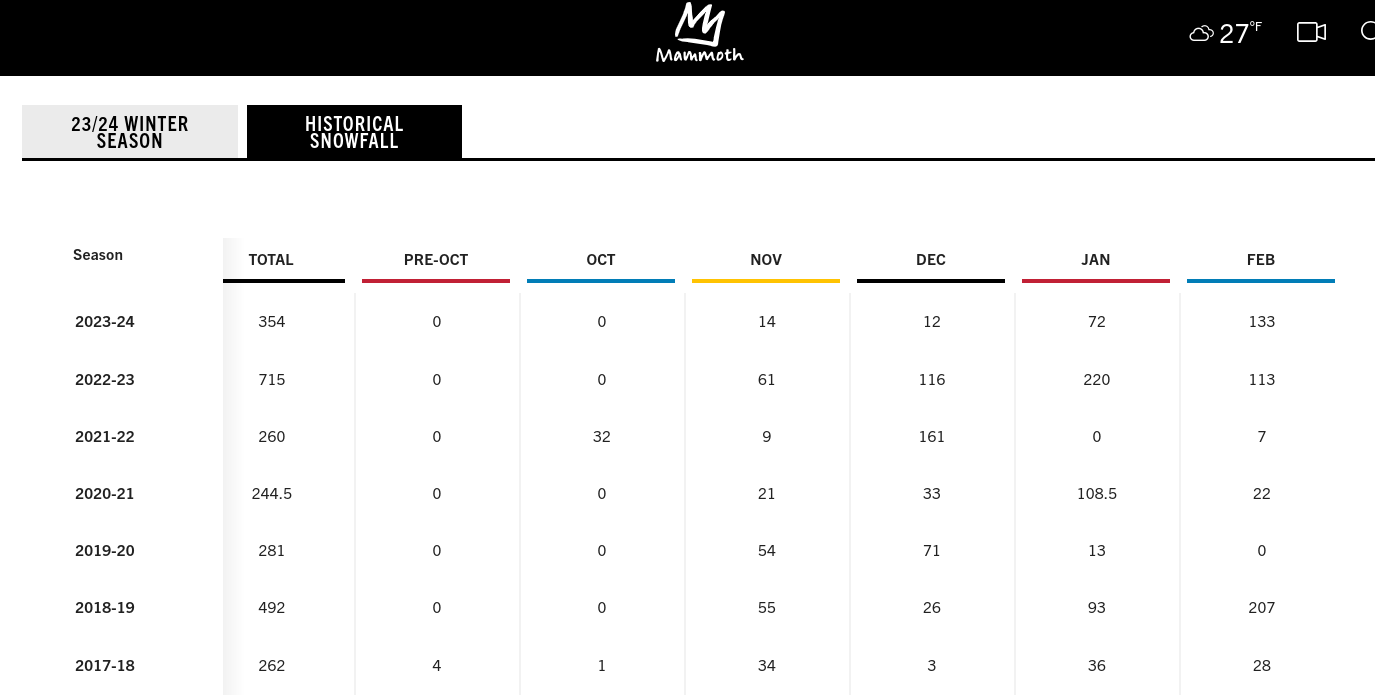

## Get Data from Webpage and Save to CSV

Do this step one time only and save the table to a csv file

`pip3 install lxml html5lib`

In [2]:
snowfall_file = "./data/mammoth_mountain_snowfall.csv"
if not os.path.exists(snowfall_file):
    url = r"https://www.mammothmountain.com/on-the-mountain/snowfall-history#tab=historical%20df"
    df = pd.read_html(url)[0]
    df.to_csv(snowfall_file)

## Read Data

In [3]:
df = pd.read_csv(snowfall_file)
df.head()

,Unnamed: 0,Season,Total,Pre-Oct,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul
0,0,2023-24,354.0,0,0.0,14.0,12.0,72.0,133.0,95.0,28.0,NaN,NaN,NaN
1,1,2022-23,715.0,0,0.0,61.0,116.0,220.0,113.0,192.0,3.0,10.0,0.0,0.0
2,2,2021-22,260.0,0,32.0,9.0,161.0,0.0,7.0,14.0,34.0,3.0,0.0,0.0
3,3,2020-21,244.5,0,0.0,21.0,33.0,108.5,22.0,53.0,5.0,2.0,0.0,0.0
4,4,2019-20,281.0,0,0.0,54.0,71.0,13.0,0.0,83.0,57.0,3.0,0.0,0.0


## Remove Unused Cols

In [4]:
df = df.fillna(0).drop(columns=["Unnamed: 0", "Total"])
df.head()

,Season,Pre-Oct,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul
0,2023-24,0,0.0,14.0,12.0,72.0,133.0,95.0,28.0,0.0,0.0,0.0
1,2022-23,0,0.0,61.0,116.0,220.0,113.0,192.0,3.0,10.0,0.0,0.0
2,2021-22,0,32.0,9.0,161.0,0.0,7.0,14.0,34.0,3.0,0.0,0.0
3,2020-21,0,0.0,21.0,33.0,108.5,22.0,53.0,5.0,2.0,0.0,0.0
4,2019-20,0,0.0,54.0,71.0,13.0,0.0,83.0,57.0,3.0,0.0,0.0


## Split Pre-October Data into September and August

In [5]:
df.insert(loc=1, column="Sep", value=0.5 * df["Pre-Oct"])
df.insert(loc=1, column="Aug", value=0.5 * df["Pre-Oct"])
df.drop(columns="Pre-Oct", inplace=True)
df.head()

,Season,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul
0,2023-24,0.0,0.0,0.0,14.0,12.0,72.0,133.0,95.0,28.0,0.0,0.0,0.0
1,2022-23,0.0,0.0,0.0,61.0,116.0,220.0,113.0,192.0,3.0,10.0,0.0,0.0
2,2021-22,0.0,0.0,32.0,9.0,161.0,0.0,7.0,14.0,34.0,3.0,0.0,0.0
3,2020-21,0.0,0.0,0.0,21.0,33.0,108.5,22.0,53.0,5.0,2.0,0.0,0.0
4,2019-20,0.0,0.0,0.0,54.0,71.0,13.0,0.0,83.0,57.0,3.0,0.0,0.0


## Remove Trailing Year From Season Column

e.g. 2022-23 -> 2022

In [6]:
df["Season"] = df["Season"].apply(lambda x: int(x.split("-")[0]))
df.rename(columns={"Season": "Year"}, inplace=True)
df.head()

,Year,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul
0,2023,0.0,0.0,0.0,14.0,12.0,72.0,133.0,95.0,28.0,0.0,0.0,0.0
1,2022,0.0,0.0,0.0,61.0,116.0,220.0,113.0,192.0,3.0,10.0,0.0,0.0
2,2021,0.0,0.0,32.0,9.0,161.0,0.0,7.0,14.0,34.0,3.0,0.0,0.0
3,2020,0.0,0.0,0.0,21.0,33.0,108.5,22.0,53.0,5.0,2.0,0.0,0.0
4,2019,0.0,0.0,0.0,54.0,71.0,13.0,0.0,83.0,57.0,3.0,0.0,0.0


## Add Current Year for Spring Months

In [7]:
df.insert(
    loc=df.columns.get_loc("Jan"),
    column="Spring Year",
    value=df["Year"] + 1,
)

df.head()

,Year,Aug,Sep,Oct,Nov,Dec,Spring Year,Jan,Feb,Mar,Apr,May,Jun,Jul
0,2023,0.0,0.0,0.0,14.0,12.0,2024,72.0,133.0,95.0,28.0,0.0,0.0,0.0
1,2022,0.0,0.0,0.0,61.0,116.0,2023,220.0,113.0,192.0,3.0,10.0,0.0,0.0
2,2021,0.0,0.0,32.0,9.0,161.0,2022,0.0,7.0,14.0,34.0,3.0,0.0,0.0
3,2020,0.0,0.0,0.0,21.0,33.0,2021,108.5,22.0,53.0,5.0,2.0,0.0,0.0
4,2019,0.0,0.0,0.0,54.0,71.0,2020,13.0,0.0,83.0,57.0,3.0,0.0,0.0


## Split Up Between Winter...

In [8]:
current_year = df[df.columns[: df.columns.get_loc("Spring Year")]]
current_year.head()

,Year,Aug,Sep,Oct,Nov,Dec
0,2023,0.0,0.0,0.0,14.0,12.0
1,2022,0.0,0.0,0.0,61.0,116.0
2,2021,0.0,0.0,32.0,9.0,161.0
3,2020,0.0,0.0,0.0,21.0,33.0
4,2019,0.0,0.0,0.0,54.0,71.0


## ... and Spring

In [9]:
next_year = df[df.columns[df.columns.get_loc("Spring Year") :]]
next_year.head()

,Spring Year,Jan,Feb,Mar,Apr,May,Jun,Jul
0,2024,72.0,133.0,95.0,28.0,0.0,0.0,0.0
1,2023,220.0,113.0,192.0,3.0,10.0,0.0,0.0
2,2022,0.0,7.0,14.0,34.0,3.0,0.0,0.0
3,2021,108.5,22.0,53.0,5.0,2.0,0.0,0.0
4,2020,13.0,0.0,83.0,57.0,3.0,0.0,0.0


## Merge on Calendar Year

In [10]:
df = (
    pd.merge(
        current_year,
        next_year,
        left_on="Year",
        right_on="Spring Year",
        how="outer",
    )
    .dropna()
    .iloc[::-1]
    .reset_index(drop=True)
)

df["Year"] = df["Year"].astype(int)

In [11]:
df.head()

,Year,Aug,Sep,Oct,Nov,Dec,Spring Year,Jan,Feb,Mar,Apr,May,Jun,Jul
0,2023,0.0,0.0,0.0,14.0,12.0,2023.0,220.0,113.0,192.0,3.0,10.0,0.0,0.0
1,2022,0.0,0.0,0.0,61.0,116.0,2022.0,0.0,7.0,14.0,34.0,3.0,0.0,0.0
2,2021,0.0,0.0,32.0,9.0,161.0,2021.0,108.5,22.0,53.0,5.0,2.0,0.0,0.0
3,2020,0.0,0.0,0.0,21.0,33.0,2020.0,13.0,0.0,83.0,57.0,3.0,0.0,0.0
4,2019,0.0,0.0,0.0,54.0,71.0,2019.0,93.0,207.0,68.0,11.0,32.0,0.0,0.0


In [12]:
df.tail()

,Year,Aug,Sep,Oct,Nov,Dec,Spring Year,Jan,Feb,Mar,Apr,May,Jun,Jul
49,1974,7.5,7.5,0.0,13.0,58.5,1974.0,87.5,9.0,82.0,38.0,0.0,0.0,0.0
50,1973,22.5,22.5,0.0,0.0,45.0,1973.0,84.9,103.0,43.0,10.0,4.0,0.0,0.0
51,1972,2.0,2.0,0.0,57.1,64.5,1972.0,32.2,11.0,1.0,53.5,0.0,0.0,0.0
52,1971,11.0,11.0,0.0,9.0,139.8,1971.0,29.0,19.5,24.0,14.0,0.0,0.0,0.0
53,1970,30.0,30.0,0.0,0.0,109.0,1970.0,78.0,30.5,46.0,27.0,0.0,0.0,0.0


## Drop Unneeded Columns

In [13]:
df.drop(columns=["Spring Year"], inplace=True)

df.head()

,Year,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul
0,2023,0.0,0.0,0.0,14.0,12.0,220.0,113.0,192.0,3.0,10.0,0.0,0.0
1,2022,0.0,0.0,0.0,61.0,116.0,0.0,7.0,14.0,34.0,3.0,0.0,0.0
2,2021,0.0,0.0,32.0,9.0,161.0,108.5,22.0,53.0,5.0,2.0,0.0,0.0
3,2020,0.0,0.0,0.0,21.0,33.0,13.0,0.0,83.0,57.0,3.0,0.0,0.0
4,2019,0.0,0.0,0.0,54.0,71.0,93.0,207.0,68.0,11.0,32.0,0.0,0.0


## Melt to Make the Column Month Headers Turn into Rows

In [14]:
df = pd.melt(
    df,
    id_vars=df.columns[0],
    value_vars=df.columns[1:],
    var_name="Month",
    value_name="Snow Fall",
).reset_index(drop=True)

df.head()

,Year,Month,Snow Fall
0,2023,Aug,0.0
1,2022,Aug,0.0
2,2021,Aug,0.0
3,2020,Aug,0.0
4,2019,Aug,0.0


## Use the Year and Month to Make a Date

In [15]:
df.insert(
    loc=0,
    column="Date",
    value=pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"], format="%Y-%b"),
)

df.head()

,Date,Year,Month,Snow Fall
0,2023-08-01,2023,Aug,0.0
1,2022-08-01,2022,Aug,0.0
2,2021-08-01,2021,Aug,0.0
3,2020-08-01,2020,Aug,0.0
4,2019-08-01,2019,Aug,0.0


## Sort by Date and Set as Index

In [16]:
df = df.sort_values(by="Date").set_index("Date").drop(columns=["Year"])

df.head()

,Month,Snow Fall
Date,,
1970-01-01,Jan,78.0
1970-02-01,Feb,30.5
1970-03-01,Mar,46.0
1970-04-01,Apr,27.0
1970-05-01,May,0.0


## Calculate Average Snowfall by Month

In [17]:
# monthly_average = df.groupby("Month")[["Snow Fall"]].agg(np.mean)
# monthly_average.rename(columns={"Snow Fall": "Monthly Average"}, inplace=True)
monthly_average = (
    df.groupby("Month")[["Snow Fall"]]
    .agg(MonthlyAverage=("Snow Fall", "mean"))
    .reindex(df.head(12)["Month"])
)
monthly_average

,MonthlyAverage
Month,
Jan,71.333333
Feb,69.761111
Mar,63.718519
Apr,32.924074
May,8.029630
Jun,0.190741
Jul,0.000000
Aug,2.870370
Sep,2.870370


In [18]:
if 0:
    monthly_average["Can Snow"] = (monthly_average["MonthlyAverage"] > 5.0).astype(int)
    monthly_average

## And Insert into Data Frame for Use as Exo Feature

In [19]:
df = (
    df.reset_index()
    .set_index(["Date", "Month"])
    .join(monthly_average, how="outer")
    .reset_index()
    .set_index("Date")
)

In [20]:
df = df.reindex(pd.date_range(start=df.index[0], periods=len(df), freq="MS"))
df.index.set_names("Date", inplace=True)
df

,Month,Snow Fall,MonthlyAverage
Date,,,
1970-01-01,Jan,78.0,71.333333
1970-02-01,Feb,30.5,69.761111
1970-03-01,Mar,46.0,63.718519
1970-04-01,Apr,27.0,32.924074
1970-05-01,May,0.0,8.029630
...,...,...,...
2023-08-01,Aug,0.0,2.870370
2023-09-01,Sep,0.0,2.870370
2023-10-01,Oct,0.0,6.372222


## Save to CSV

Look how clever I am with the name

In [21]:
df.to_csv("./data/mammoth_mountain_snowfall_melted_table_with_monthly_average.csv")

## Plot Snowfall per Month

<Axes: xlabel='Date'>

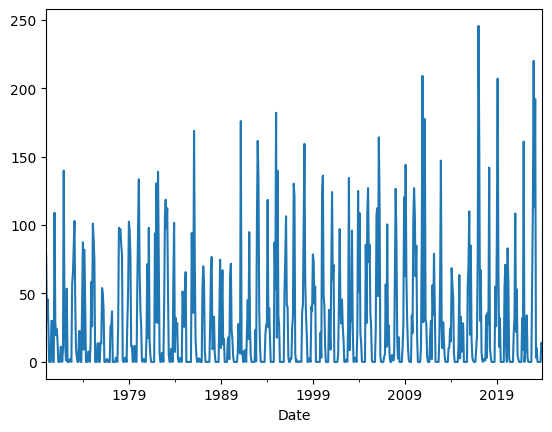

In [22]:
df["Snow Fall"].plot()